# Data wrangling project - Dog rating data set from Twitter <br>

<div style="text-align: right"><h4><b>- Nithin Jacob Cherian</b></div>

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#store)
   

<a id='intro'></a>
## Introduction

This project wrangles data related to tweets in Weratedogs twitter account. The dataset contains the ratings received for a dog in each tweet, number of followers for each tweet and also image predictions using machine learning algorithm.

In [285]:
# import all necessary libraries
import pandas as pd
import requests
import tweepy
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gather'></a>

# Gather data

## 1. The WeRateDogs Twitter archive from csv file

In [286]:
Dogarchive=pd.read_csv('twitter-archive-enhanced.csv')
Dogarchive.head()
Dogarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## 2. Programatic download of tsv data with Dog image urls

In [287]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
folder_name='tweet_image'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [288]:
# storing the tsv data into a dataframe
imagepred=pd.read_csv(os.path.join(folder_name,"image-predictions.tsv"),delimiter="\t")

## 2. Data from Twitter

In [289]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden-1QZhfMa4QD5060D5QVxiUH1bbUwu3isJJlL16izg'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser = tweepy.parsers.JSONParser(),wait_on_rate_limit = True,wait_on_rate_limit_notify = True)

In [290]:
tweet_id=Dogarchive['tweet_id']
list_of_tweets=[]
no_tweets_found=[]
for tweet in tweet_id:
    try:
        list_of_tweets.append(api.get_status(tweet))
    except Exception as e:
        no_tweets_found.append(tweet)

Rate limit reached. Sleeping for: 613
Rate limit reached. Sleeping for: 608


In [363]:
print("Number of tweets identified ",len(list_of_tweets))
print("Number of tweets not identified ",len(no_tweets_found))

Number of tweets identified  2329
Number of tweets not identified  27


In [364]:
list_of_tweets[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


In [365]:
# store json data into text file
with open('tweet_json.txt',"w") as file:
    for tweet_data in list_of_tweets:
        data=json.dumps(tweet_data)
        file.write(data+"\n")

In [366]:
# Create a dataframe from the tweet data that we just retrieved.
tweet_data = []
with open('tweet_json.txt') as json_file:
    for json_obj in json_file:
        tweet_shortdata_dict = {}
        tweet_alldata_dict = json.loads(json_obj)

        # Get all of the data we're interested in
        tweet_shortdata_dict['tweet_id'] = tweet_alldata_dict['id']
        tweet_shortdata_dict['retweet_count'] = tweet_alldata_dict['retweet_count']
        tweet_shortdata_dict['favorite_count'] = tweet_alldata_dict['favorite_count']
        whole_tweet = tweet_alldata_dict['text']
        tweet_shortdata_dict["short_url"] = whole_tweet[whole_tweet.find('https'):]
        tweet_shortdata_dict['followers_count'] = tweet_alldata_dict['user']['followers_count']
        tweet_shortdata_dict['friends_count'] = tweet_alldata_dict['user']['friends_count']
        whole_source = tweet_alldata_dict['source']
        tweet_shortdata_dict['only_device'] = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        tweet_shortdata_dict['retweeted_status'] = tweet_alldata_dict.get('retweeted_status', 'Original tweet')
        if tweet_shortdata_dict['retweeted_status']!="Original tweet":
            tweet_shortdata_dict['retweeted_status']="Retweet"
        # Append it to the data gathering list
        tweet_data.append(tweet_shortdata_dict)

# Create a dataframe from the data
tweet_data_df = pd.DataFrame(tweet_data)
tweet_data_df.head()

,tweet_id,retweet_count,favorite_count,short_url,followers_count,friends_count,only_device,retweeted_status
0,892420643555336193,7612,35899,https://t.co/MgUWQ76dJU,8811161,17,Twitter for iPhone,Original tweet
1,892177421306343426,5638,30969,https://t.co/aQFSeaCu9L,8811161,17,Twitter for iPhone,Original tweet
2,891815181378084864,3730,23304,https://t.co/r0YlrsGCgy,8811831,17,Twitter for iPhone,Original tweet
3,891689557279858688,7785,39183,https://t.co/tD36da7qLQ,8811161,17,Twitter for iPhone,Original tweet
4,891327558926688256,8385,37416,https://t.co/0g0KMIVXZ3,8811831,17,Twitter for iPhone,Original tweet


In [367]:
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2329 non-null   int64 
 1   retweet_count     2329 non-null   int64 
 2   favorite_count    2329 non-null   int64 
 3   short_url         2329 non-null   object
 4   followers_count   2329 non-null   int64 
 5   friends_count     2329 non-null   int64 
 6   only_device       2329 non-null   object
 7   retweeted_status  2329 non-null   object
dtypes: int64(5), object(3)
memory usage: 145.7+ KB


<a id='assess'></a>
# Assessing data

## Manual assessment

### Each dataframe is displayed in the Jupyter Notebook for visual assessment purposes.

In [368]:
Dogarchive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [369]:
imagepred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [370]:
tweet_data_df

,tweet_id,retweet_count,favorite_count,short_url,followers_count,friends_count,only_device,retweeted_status
0,892420643555336193,7612,35899,https://t.co/MgUWQ76dJU,8811161,17,Twitter for iPhone,Original tweet
1,892177421306343426,5638,30969,https://t.co/aQFSeaCu9L,8811161,17,Twitter for iPhone,Original tweet
2,891815181378084864,3730,23304,https://t.co/r0YlrsGCgy,8811831,17,Twitter for iPhone,Original tweet
3,891689557279858688,7785,39183,https://t.co/tD36da7qLQ,8811161,17,Twitter for iPhone,Original tweet
4,891327558926688256,8385,37416,https://t.co/0g0KMIVXZ3,8811831,17,Twitter for iPhone,Original tweet
...,...,...,...,...,...,...,...,...
2324,666049248165822465,40,96,https://t.co/4B7cOc1EDq,8811190,17,Twitter for iPhone,Original tweet
2325,666044226329800704,130,269,https://t.co/DWnyCjf2mx,8811190,17,Twitter for iPhone,Original tweet
2326,666033412701032449,41,111,https://t.co/y671yMhoiR,8811190,17,Twitter for iPhone,Original tweet
2327,666029285002620928,42,120,https://t.co/r7mOb2m0UI,8811190,17,Twitter for iPhone,Original tweet


## Programmatic assessment¶

### Assess the data using panda functions

In [371]:
Dogarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [372]:
sum(Dogarchive['tweet_id'].duplicated())

0

In [373]:
numerators=Dogarchive.rating_numerator.unique()
Dogarchive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [374]:
#print whole text in order to verify numerators
indexes=[]
for j,i in enumerate(numerators):
    indexes.append(Dogarchive[i == Dogarchive['rating_numerator']].index.values[0])
    print(j+1,Dogarchive['rating_numerator'][indexes[j]],Dogarchive['text'][indexes[j]],"\n")

1 13 This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU 

2 12 This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB 

3 14 This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A 

4 5 This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 

5 17 @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s 

6 11 Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4 

7 10 @ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs 

8 420 @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research 


> some of the numerators seems to be fractional due to averaging of multiple dogs

In [375]:
# fractional ratings
with pd.option_context('max_colwidth', 150):
    display(Dogarchive[Dogarchive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [376]:
denominators=Dogarchive.rating_denominator.unique()

In [377]:
#print whole text in order to verify rating_denominator
indexes=[]
for j,i in enumerate(denominators):
    indexes.append(Dogarchive[i == Dogarchive['rating_denominator']].index.values[0])
    print(Dogarchive['tweet_id'][indexes[j]],Dogarchive['rating_numerator'][indexes[j]],Dogarchive['rating_denominator'][indexes[j]],Dogarchive['text'][indexes[j]])

892420643555336193 13 10 This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
835246439529840640 960 0 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
832088576586297345 11 15 @docmisterio account started on 11/15/15
820690176645140481 84 70 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
810984652412424192 24 7 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
775096608509886464 9 11 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
758467244762497024 165 150 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
731156023742988288 204 170 Say hello to this unbelievably well behaved squad of doggos.

> some denomenators are to be corrected manually

| Twitter ID         | Old Rating numerator | Old Rating denomenator | New Rating numerator | New Rating denomenator |
|--------------------|----------------------|------------------------|----------------------|------------------------|
| 835246439529840640 | 960                  | 0                      | 13                   | 10                     |
| 832088576586297345 | 11                   | 15                     | NaN                  | NaN                    |
| 810984652412424192 | 24                   | 7                      | NaN                  | NaN                    |
| 775096608509886464 | 9                    | 11                     | 14                   | 10                     |
| 722974582966214656 | 4                    | 20                     | 13                   | 10                     |
| 716439118184652801 | 50                   | 50                     | 11                   | 10                     |
| 666287406224695296 | 1                    | 2                      | 9                    | 10                     |

> The ratings with denomenator more than 10 are for multiple dogs and therefore we need to programmatically convert the scale to 10

In [378]:
imagepred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1491,782747134529531904,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,golden_retriever,0.560699,True,otterhound,0.199482,True,clumber,0.040682,True
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
772,689557536375177216,https://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg,1,Eskimo_dog,0.169482,True,Siberian_husky,0.161655,True,dingo,0.154414,False
2006,877611172832227328,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True


In [379]:
imagepred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [380]:
sum(imagepred.tweet_id.duplicated()),sum(imagepred.jpg_url.duplicated())

(0, 66)

In [381]:
pd.concat(g for _, g in imagepred.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1033,711694788429553666,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False


In [382]:
print(imagepred.p1_dog.value_counts())
print(imagepred.p2_dog.value_counts())
print(imagepred.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [383]:
imagepred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [384]:
tweet_data_df.sample(10)

,tweet_id,retweet_count,favorite_count,short_url,followers_count,friends_count,only_device,retweeted_status
717,781163403222056960,2763,9885,https://t.co/YkHc7U7uUy,8811164,17,Twitter for iPhone,Original tweet
901,755110668769038337,11031,21109,https://t.co/goX3jewkYN,8811173,17,Twitter for iPhone,Original tweet
1917,673708611235921920,272,1029,https://t.co/kLV8zUCfc8,8811191,17,Twitter for iPhone,Original tweet
1739,678410210315247616,1762,4123,https://t.co/dIy88HwrX8,8811180,17,Twitter for iPhone,Original tweet
800,770093767776997377,3056,0,https://t.co/o5J479bZUC,8811163,17,Twitter for iPhone,Retweet
560,800751577355128832,2831,10688,https://t.co/4UwCTW3lXG,8811164,17,Twitter for iPhone,Original tweet
1985,672239279297454080,306,858,https://t.co/UHJE0UgMf7,8811191,17,Twitter for iPhone,Original tweet
113,870063196459192321,7627,34318,https://t.co/pf6BEpgCfo,8811161,17,Twitter for iPhone,Original tweet
1690,680221482581123072,289,1448,https://t.co/ZJUypFFwvg,8811179,17,Twitter for iPhone,Original tweet
1706,679828447187857408,13745,35679,https://t.co/hyAC5Hq9GC,8811179,17,Twitter for iPhone,Original tweet


In [385]:
tweet_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2329 non-null   int64 
 1   retweet_count     2329 non-null   int64 
 2   favorite_count    2329 non-null   int64 
 3   short_url         2329 non-null   object
 4   followers_count   2329 non-null   int64 
 5   friends_count     2329 non-null   int64 
 6   only_device       2329 non-null   object
 7   retweeted_status  2329 non-null   object
dtypes: int64(5), object(3)
memory usage: 145.7+ KB


In [386]:
tweet_data_df.retweeted_status.value_counts()

Original tweet    2166
Retweet            163
Name: retweeted_status, dtype: int64

In [387]:
tweet_data_df.only_device.value_counts()

Twitter for iPhone     2195
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: only_device, dtype: int64

<a id='quality'></a>
## Quality

### Completeness, validity, accuracy, consistency (content issues)

#### dogarchive
    1. The dataset contains not only original ratings, but also retweet ratings.
    2. Delete irrelevant columns that won't be used for analysis
    3. Incorrect number rating numerator
    4. Correct denominators other than 10. 
    5. Datatype for timestamp not correct
    
       
#### imagepred
    6. Drop duplicates in the jpg_url column
    7. Create 1 column for image prediction and 1 column for confidence level
    
#### tweet_data_df
    8. Invalid urls in short_url
    9. Keep original tweets only
    
<a id='tidiness'></a>
## Tidiness
    10. Erroneous data columns (doggo, floofer, pupper and puppo columns)
    11. Multiple tables for same dataset

<a id='clean'></a>
# Cleaning Data

In [388]:
Dogarchive_clean = Dogarchive.copy()
imagepred_clean = imagepred.copy()
tweet_data_df_clean = tweet_data_df.copy()

### Quality related cleaning

 **1. The dataset contains not only original ratings, but also retweet ratings.**

Define : Delete retweets by filtering the null values in retweeted_status_user_id column

In [389]:
#CODE: 
Dogarchive_clean = Dogarchive_clean[pd.isnull(Dogarchive_clean['retweeted_status_user_id'])]

#TEST
print(sum(Dogarchive_clean.retweeted_status_user_id.value_counts()))

0


In [390]:
Dogarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

**2. Delete columns like doggo, floofer, pupper and puppo that won't be used for analysis**

In [391]:
Dogarchive_clean.drop(columns=['source','in_reply_to_status_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','expanded_urls'],inplace=True)

In [392]:
#Test
list(Dogarchive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**3. Correct Incorrect number rating numerator**

    a. Fractional ratings

In [393]:
# Find indexes of text with fractional ratings
with pd.option_context('max_colwidth', 200):
    display(Dogarchive_clean[Dogarchive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [394]:
#CODE

#First change numerator and denominators type int to float to allow decimals 
Dogarchive_clean[['rating_numerator', 'rating_denominator']] = Dogarchive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators

Dogarchive_clean.loc[Dogarchive_clean.tweet_id==883482846933004288, 'rating_numerator'] = 13.5
Dogarchive_clean.loc[Dogarchive_clean.tweet_id==786709082849828864, 'rating_numerator'] = 9.75
Dogarchive_clean.loc[Dogarchive_clean.tweet_id==778027034220126208, 'rating_numerator'] = 11.27
Dogarchive_clean.loc[Dogarchive_clean.tweet_id==681340665377193984, 'rating_numerator'] = 9.5
Dogarchive_clean.loc[Dogarchive_clean.tweet_id==680494726643068929, 'rating_numerator'] = 11.26
Dogarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   rating_numerator    2175 non-null   float64
 4   rating_denominator  2175 non-null   float64
 5   name                2175 non-null   object 
 6   doggo               2175 non-null   object 
 7   floofer             2175 non-null   object 
 8   pupper              2175 non-null   object 
 9   puppo               2175 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 186.9+ KB


In [395]:
#Test
with pd.option_context('max_colwidth', 200):
    display(Dogarchive_clean[Dogarchive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


**4. Dogarchive- Correct the denominators**

a. Manual

Define - some of the ratings are mistyped or gathered wrong. Need to be manually corrected

| Twitter ID         | Old Rating numerator | Old Rating denomenator | New Rating numerator | New Rating denomenator |
|--------------------|----------------------|------------------------|----------------------|------------------------|
| 835246439529840640 | 960                  | 0                      | 13                   | 10                     |
| 832088576586297345 | 11                   | 15                     | NaN                  | NaN                    |
| 810984652412424192 | 24                   | 7                      | NaN                  | NaN                    |
| 775096608509886464 | 9                    | 11                     | 14                   | 10                     |
| 722974582966214656 | 4                    | 20                     | 13                   | 10                     |
| 716439118184652801 | 50                   | 50                     | 11                   | 10                     |
| 666287406224695296 | 1                    | 2                      | 9                    | 10                     |

In [396]:
#CODE: Update both numerators and denominators
Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 835246439529840640), 'rating_numerator'] = 13
Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 835246439529840640), 'rating_denominator'] = 10

Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 775096608509886464), 'rating_numerator'] = 14
Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 775096608509886464), 'rating_denominator'] = 10

Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 11
Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
Dogarchive_clean.loc[(Dogarchive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10


#CODE: Delete five tweets with no actual ratings
Dogarchive_clean = Dogarchive_clean[Dogarchive_clean['tweet_id'] != 832088576586297345]
Dogarchive_clean = Dogarchive_clean[Dogarchive_clean['tweet_id'] != 810984652412424192]

#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(Dogarchive_clean[Dogarchive_clean['rating_denominator'] != 10][['tweet_id','text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1598,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0


b. Programatically <br><br>
Define - These tweets above with denominator not equal to 10 are for multiple dogs. So, we get the ratings out of 10 by dividing numerator and denominator and multiplying by 10

In [397]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
Dogarchive_clean['rating_numerator'] = 10 * Dogarchive_clean['rating_numerator'] / Dogarchive_clean['rating_denominator']
Dogarchive_clean['rating_denominator']= 10

#TEST
Dogarchive_clean.loc[Dogarchive_clean.tweet_id==820690176645140481,:]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the flo...,12.0,10,None,None,None,None,None


**5. Dogarchive - Datatype for timestamp not correct**

Define : Change data type to datetime

In [398]:
Dogarchive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,None,None,None,None


In [399]:
#CODE: convert timestamp to datetime
Dogarchive_clean['timestamp'] = pd.to_datetime(Dogarchive_clean['timestamp'])

#Test
Dogarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2173 non-null   int64              
 1   timestamp           2173 non-null   datetime64[ns, UTC]
 2   text                2173 non-null   object             
 3   rating_numerator    2173 non-null   float64            
 4   rating_denominator  2173 non-null   int64              
 5   name                2173 non-null   object             
 6   doggo               2173 non-null   object             
 7   floofer             2173 non-null   object             
 8   pupper              2173 non-null   object             
 9   puppo               2173 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 186.7+ KB


**6. Imagepred dataframe - Drop duplicates in the jpg_url column**

In [400]:
# Define - Delete the 66 duplicates in the jpg url column

#CODE: 
imagepred_clean = imagepred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(imagepred_clean['jpg_url'].duplicated())

0

**7. Image_prediction** - Create 1 column for image prediction and 1 column for confidence level

Create a function where I keep the first true prediction along the confidence level as new columns.

In [401]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(imagepred_clean):
    if imagepred_clean['p1_dog'] == True:
        dog_type.append(imagepred_clean['p1'])
        confidence_list.append(imagepred_clean['p1_conf'])
    elif imagepred_clean['p2_dog'] == True:
        dog_type.append(imagepred_clean['p2'])
        confidence_list.append(imagepred_clean['p2_conf'])
    elif imagepred_clean['p3_dog'] == True:
        dog_type.append(imagepred_clean['p3'])
        confidence_list.append(imagepred_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
imagepred_clean.apply(image, axis=1)

#create new columns
imagepred_clean['dog_type'] = dog_type
imagepred_clean['confidence_list'] = confidence_list

#drop rows that has prediction_list 'error'
imagepred_clean = imagepred_clean[imagepred_clean['dog_type'] != 'Error']

#Delete columns
imagepred_clean = imagepred_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#TEST
list(imagepred_clean)

['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

In [402]:
imagepred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1691 non-null   int64 
 1   jpg_url          1691 non-null   object
 2   dog_type         1691 non-null   object
 3   confidence_list  1691 non-null   object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


**8. tweet_data_df - Incorrect short urls to Nan**

Define - set false short urls to empty

In [403]:
#Code
tweet_data_df.loc[tweet_data_df['short_url'].str.len()<10,'short_url']=""

#Test

with pd.option_context('max_colwidth', 200):
    display(tweet_data_df[tweet_data_df['short_url'].str.len()<10]
            [['tweet_id', 'short_url']])

,tweet_id,short_url
29,886267009285017600,
54,881633300179243008,
63,879674319642796034,
67,879130579576475649,
72,878404777348136964,
...,...,...
1913,673716320723169284,
2011,671550332464455680,
2122,669684865554620416,
2162,668967877119254528,


**9. Tweet_json - keep only original tweets**

Define - delete all the retweets

In [404]:
#CODE:
tweet_data_df_clean = tweet_data_df_clean[tweet_data_df_clean['retweeted_status'] == 'Original tweet']

#TEST
tweet_data_df_clean['retweeted_status'].value_counts()

Original tweet    2166
Name: retweeted_status, dtype: int64

In [405]:
#Drop the retweeted status column
tweet_data_df_clean.drop('retweeted_status',axis=1,inplace=True)

### Tidiness related cleaning

**10.Erroneous data columns (doggo, floofer, pupper and puppo columns)**

Define: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_group column.

In [406]:
#CODE: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_group column
Dogarchive_clean = pd.melt(Dogarchive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dogs_group')

#CODE: drop dogs
Dogarchive_clean = Dogarchive_clean.drop('dogs', axis=1)

#CODE: Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
Dogarchive_clean = Dogarchive_clean.sort_values('dogs_group').drop_duplicates(subset='tweet_id',
                                                                                        keep='last')

In [407]:
#TEST
Dogarchive_clean['dogs_group'].value_counts()

None       1829
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_group, dtype: int64

In [408]:
Dogarchive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_group
2094,667437278097252352,2015-11-19 20:20:22+00:00,Never seen this breed before. Very pointy pup....,10.0,10,None,None
2093,667443425659232256,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10,None,None
2092,667453023279554560,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,11.0,10,Cupcake,None
2091,667455448082227200,2015-11-19 21:32:34+00:00,This is Reese and Twips. Reese protects Twips....,7.0,10,Reese,None
2090,667470559035432960,2015-11-19 22:32:36+00:00,This is a northern Wahoo named Kohl. He runs t...,11.0,10,a,None


**11. Tidiness - Multiple tables for same dataset**

Define - Merge all three tables to a single dataframe based on the tweet id column

In [409]:
#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter= pd.merge(Dogarchive_clean, 
                      imagepred_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter = df_twitter[df_twitter['jpg_url'].notnull()]

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 2 to 2171
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1625 non-null   int64              
 1   timestamp           1625 non-null   datetime64[ns, UTC]
 2   text                1625 non-null   object             
 3   rating_numerator    1625 non-null   float64            
 4   rating_denominator  1625 non-null   int64              
 5   name                1625 non-null   object             
 6   dogs_group          1625 non-null   object             
 7   jpg_url             1625 non-null   object             
 8   dog_type            1625 non-null   object             
 9   confidence_list     1625 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 139.6+ KB


In [410]:
#CODE: create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter1 = pd.merge(df_twitter, tweet_data_df_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1625 non-null   int64              
 1   timestamp           1625 non-null   datetime64[ns, UTC]
 2   text                1625 non-null   object             
 3   rating_numerator    1625 non-null   float64            
 4   rating_denominator  1625 non-null   int64              
 5   name                1625 non-null   object             
 6   dogs_group          1625 non-null   object             
 7   jpg_url             1625 non-null   object             
 8   dog_type            1625 non-null   object             
 9   confidence_list     1625 non-null   object             
 10  retweet_count       1617 non-null   float64            
 11  favorite_count      1617 non-null   float64            
 12  short_url           1617 non-null 

In [411]:
df_twitter['rating_numerator'].value_counts()

12.000000    407
10.000000    354
11.000000    349
13.000000    212
9.000000     134
8.000000      68
7.000000      31
14.000000     21
6.000000      16
5.000000      13
4.000000       6
3.000000       5
2.000000       2
13.500000      1
8.181818       1
9.750000       1
0.000000       1
11.260000      1
11.270000      1
6.363636       1
Name: rating_numerator, dtype: int64

<a id='store'></a>
## Storing, Analyzing, and Visualizing Data

In [412]:
#Save the data to a csv file
df_twitter1.to_csv('twitter_archive_cleaned.csv', 
                 index=False, encoding = 'utf-8')

### **Insight 1 - Most Common Dog breed**

In [413]:
df_twitter1['dog_type'].value_counts()

golden_retriever        142
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
EntleBucher               1
standard_schnauzer        1
silky_terrier             1
Bouvier_des_Flandres      1
clumber                   1
Name: dog_type, Length: 113, dtype: int64

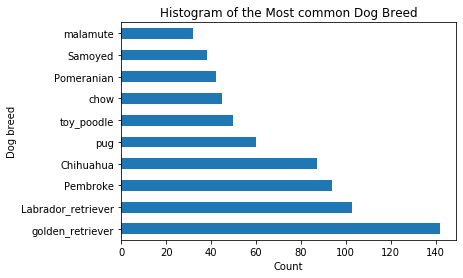

In [414]:
topbreeds=df_twitter1['dog_type'].value_counts().head(10)
topbreeds.plot(kind = 'barh')
plt.title('Histogram of the Most common Dog Breed')
plt.xlabel('Count')
plt.ylabel('Dog breed')

fig = plt.gcf() 
fig.savefig('Most common dog breed.png',bbox_inches='tight');

> Most common breed is Gold retriever

### **Insight 2 - Most common dog type**

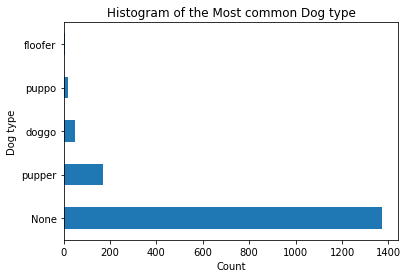

In [415]:
topgroups=df_twitter1['dogs_group'].value_counts()
topgroups.plot(kind = 'barh')
plt.title('Histogram of the Most common Dog type')
plt.xlabel('Count')
plt.ylabel('Dog type')

fig = plt.gcf() 
fig.savefig('Most common dog type.png',bbox_inches='tight');

> Most common dog group is pupper

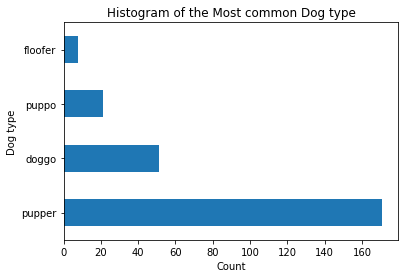

In [416]:
# Without none category
topgroups=df_twitter1[df_twitter1['dogs_group']!="None"].dogs_group.value_counts()
topgroups.plot(kind = 'barh')
plt.title('Histogram of the Most common Dog type')
plt.xlabel('Count')
plt.ylabel('Dog type')

fig = plt.gcf() 
fig.savefig('Most common dog type.png',bbox_inches='tight');

### **Insight 3 - Highest and Lowest ratings**

In [417]:
df_dog_type_mean = df_twitter1.groupby('dog_type').mean()

In [418]:
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,friends_count
dog_type,,,,,,,
Afghan_hound,809599852776681472,8.000000,10,3103.500000,11026.500000,8.811164e+06,17.0
Airedale,718448940360117248,9.833333,10,1211.083333,4784.083333,8.811178e+06,17.0
American_Staffordshire_terrier,759728394572314624,10.312500,10,1790.000000,7658.333333,8.811173e+06,17.0
Appenzeller,793933403993278464,11.000000,10,1251.000000,6636.000000,8.811169e+06,17.0
Australian_terrier,778592105778309120,11.500000,10,2706.000000,10118.500000,8.811170e+06,17.0


In [419]:
df_dog_type_sorted = df_dog_type_mean['rating_numerator'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
                                 ...    
Border_terrier                 12.142857
Irish_setter                   12.333333
briard                         12.333333
Saluki                         12.500000
Bouvier_des_Flandres           13.000000
Name: rating_numerator, Length: 113, dtype: float64

In [420]:
print(df_twitter1.loc[df_twitter1.dog_type == 'Japanese_spaniel', 'short_url']) 

709    https://t.co/IoLRvF0Kak
Name: short_url, dtype: object


In [421]:
print(df_twitter1.loc[df_twitter1.dog_type == 'Bouvier_des_Flandres', 'short_url']) 

1073    https://t.co/4LsQRyEp9j
Name: short_url, dtype: object


### **Insight 4 - Variation of ratings with number of ratings**

In [422]:
df_dog_type_count = df_twitter1.groupby('dog_type').count()
df_dog_type_count

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_group,jpg_url,confidence_list,retweet_count,favorite_count,short_url,followers_count,friends_count,only_device
dog_type,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,15,15,15,15,15,15
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,50,50,50,50,50,50,50,50,50,49,49,49,49,49,49
toy_terrier,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
vizsla,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [423]:
dog_type_count = df_dog_type_count['rating_numerator']
dog_type_mean = df_dog_type_mean['rating_numerator']
dog_type_mean

dog_type
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
                                    ...    
toy_poodle                        11.020000
toy_terrier                       10.333333
vizsla                            10.846154
whippet                           10.181818
wire-haired_fox_terrier           11.500000
Name: rating_numerator, Length: 113, dtype: float64

Text(0.5, 1.0, 'Average Rating of Dog Type by Number of Ratings of a Dog Type \n')

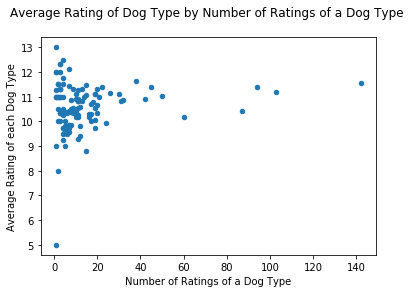

In [424]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of each Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type \n')

> Dog_types with low number of ratings show a high variaty of mean ratings.

### **Insight 5 - Variation of ratings with number of ratings**

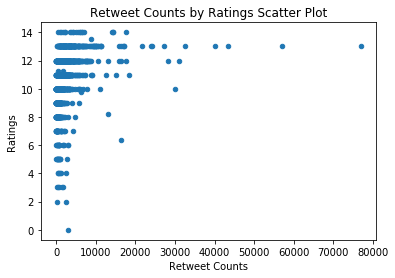

In [425]:
df_twitter1.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

> There is not enough evidence in the plot above to conclude that the high rated tweets have more retweets.